# Exercise 4

Same than exercise 1 but using Sklearn and KNeighborsClassifier

## Question 1

The first part of the exercise is the same than the previous, we initialize tha data, plot it and intialize the points we aim to predict

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X = np.loadtxt('microchips.csv', delimiter=',', dtype='float64', usecols=(0,1))
y = np.loadtxt('microchips.csv', delimiter=',', dtype='float64', usecols=2)

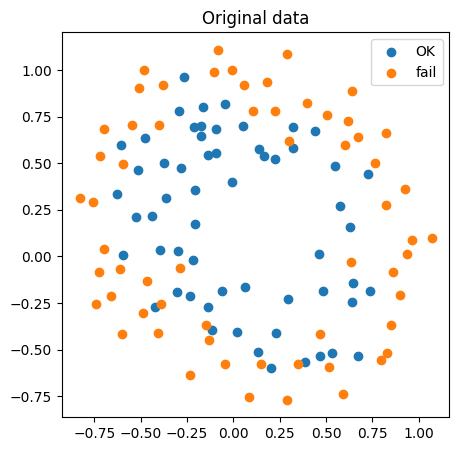

In [15]:
ok = X[y == 1]
fail = X[y==0]
plt.figure(figsize=(5,5))
plt.scatter(ok[:,0], ok[:,1], label='OK')
plt.scatter(fail[:,0], fail[:,1], label='fail')
plt.title('Original data')
plt.legend()
plt.show()

## Question 2

In [16]:
point1 = np.array([-0.3, 1.0])
point2 = np.array([-0.5, -0.1])
point3 = np.array([0.6, 0.0])
points = np.array([point1, point2, point3])

In [17]:
ks = np.array([1,3,5,7])

Here, we are going to initialize the variable "neigh" for each different k. Then we'll have to fit the data to this variable. 
For each point of each k, we need to use the neigh.predict method to check if the point if failing (0) or not (1). The rest is the same method than in the first exercise.

In [18]:
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X,y)
    print('k =', str(k))
    for p in range(len(points)):
        print("  chip", p + 1,':[',points[p][0], ', ', points[p][1], ']', end=' ==> ')
        result = neigh.predict([points[p]])
        if (int(result[0]) == 1):
            print('OK')
        else:
            print('Fail')

k = 1
  chip 1 :[ -0.3 ,  1.0 ] ==> OK
  chip 2 :[ -0.5 ,  -0.1 ] ==> Fail
  chip 3 :[ 0.6 ,  0.0 ] ==> Fail
k = 3
  chip 1 :[ -0.3 ,  1.0 ] ==> Fail
  chip 2 :[ -0.5 ,  -0.1 ] ==> Fail
  chip 3 :[ 0.6 ,  0.0 ] ==> OK
k = 5
  chip 1 :[ -0.3 ,  1.0 ] ==> Fail
  chip 2 :[ -0.5 ,  -0.1 ] ==> OK
  chip 3 :[ 0.6 ,  0.0 ] ==> OK
k = 7
  chip 1 :[ -0.3 ,  1.0 ] ==> Fail
  chip 2 :[ -0.5 ,  -0.1 ] ==> Fail
  chip 3 :[ 0.6 ,  0.0 ] ==> OK


## Question 3

In [19]:
min_x, max_x = min(X[:, 0]), max(X[:, 0])
min_y, max_y = min(X[:, 1]), max(X[:, 1])
grid_size = 100
x_axis = np.linspace(min_x, max_x, grid_size)
y_axis = np.linspace(min_y, max_y, grid_size) 
grid = np.zeros(shape=(len(x_axis), len(y_axis)))
grid_shape = (2, 2)
plt.figure(figsize=(8,8))
plt.suptitle("Plotting depending on the values of k")

Text(0.5, 0.98, 'Plotting depending on the values of k')

<Figure size 800x800 with 0 Axes>

Here, we are going, for each k, initialize a variable neigh again and fit the data according to the number of k.
For every point on the grid, we initialize the coordinates by creating a point in an array. Then we predict this point and put them into a grid that will represent the colors of the failing/winning zones.

To confirm the result, we take all the values of X and y and we compare them according to the prediction. We then calculate the accuracy further on.

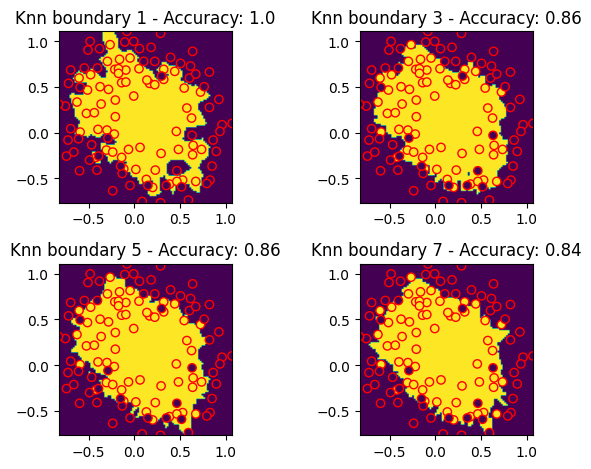

In [20]:
for idx, k in enumerate(ks):
    plt.subplot(grid_shape[0], grid_shape[1], idx + 1)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X,y)
    for ix, vx in enumerate(x_axis):
        for iy, vy in enumerate(y_axis):
            point = np.array([vx, vy])
            prediction = neigh.predict([point])[0]
            grid[ix, iy] = prediction
    error = 0
    for x in range(len(X)):
        pt = np.array([X[x][0], X[x][1]])
        pred = neigh.predict([pt])
        result = y[x]
        if (int(pred[0]) != int(result)):
            error += 1
    accuracy = 1 - (error / len(X))
    accuracy = round(accuracy, 2)
    plt.imshow(grid.T, origin='lower', extent=(min_x, max_x, min_y, max_y))
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='r')
    title = 'Knn boundary ' + str(k) + ' - Accuracy: ' + str(accuracy)
    plt.title(title)
plt.tight_layout()
plt.show()

## References and links:

Introduction on Scikit Learn and KNN neighbors: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

sklearn.neighbors.KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier